In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Exploring Data And Analysing Data

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation


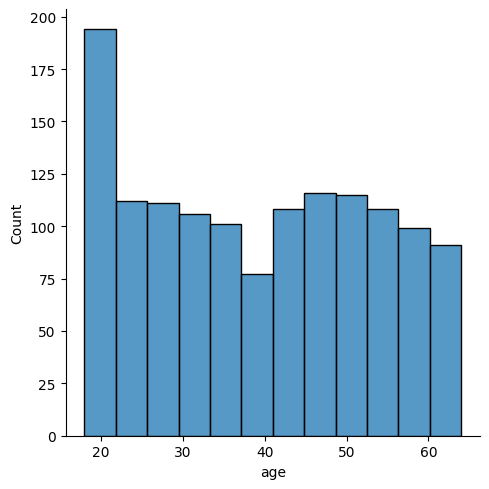

In [7]:
sns.displot(data=df,x="age")

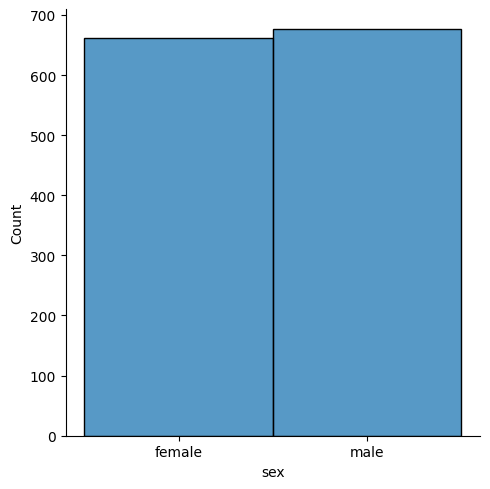

In [8]:
sns.displot(data=df,x="sex")

In [9]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

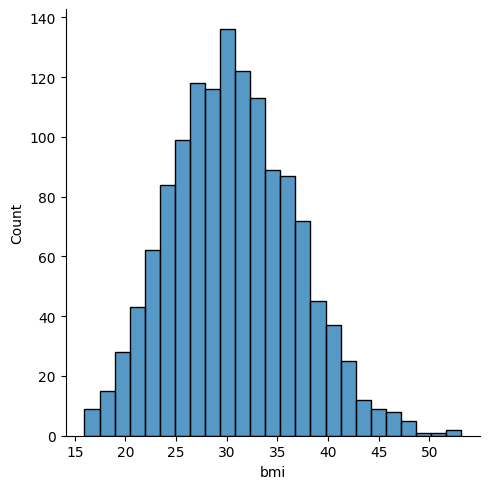

In [10]:
sns.displot(data=df,x="bmi")

In [11]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Axes: xlabel='children', ylabel='count'>

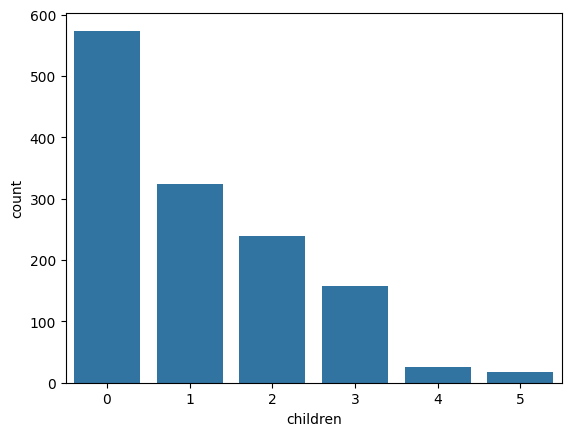

In [12]:
sns.countplot(data=df,x="children")

In [13]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

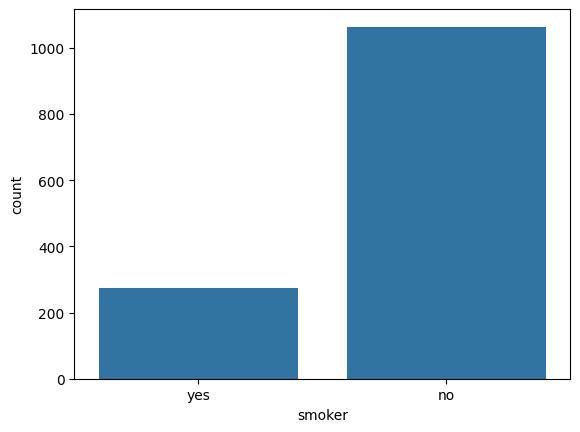

In [14]:
sns.countplot(data=df,x="smoker")

In [15]:
#convert categorical column to  numerical

In [16]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [24]:
df.replace({"sex":{"male":0,"female":1}},inplace=True)
df.replace({"smoker":{"yes":0,"no":1}},inplace=True)
df.replace({"region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)           

In [27]:
df.head(22)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,2,7281.50560
8,37,0,29.830,2,1,3,6406.41070
9,60,1,25.840,0,1,2,28923.13692


# Train test split

In [33]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [34]:
X.shape

(1338, 6)

In [35]:
y.shape

(1338,)

#Train test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [39]:
X_train.shape

(1070, 6)

In [41]:
X_test.shape

(268, 6)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train) # 80 model will be train
y_pred = lr.predict(X_test) # 10 model will be predicted

In [45]:
r2_score(y_test,y_pred)

0.7839279776463969

In [46]:
y_pred

array([ 8856.65153636,  7101.88235849, 36893.61898787,  9470.36424143,
       27035.84844455, 11121.15083661,   194.09439363, 16942.63177789,
         972.62454495, 11239.06358677, 28337.45140066,  9407.03414399,
        5100.77914376, 38290.05571632, 40126.40737963, 36966.36366389,
       15096.3872809 , 35777.70894683,  8940.64593222, 31505.00605268,
        4061.94336316, 10360.63353419,  2608.66446297,  7069.75332971,
       11320.86452392, 12864.28554664, 14741.9908235 ,  6192.39035484,
        9853.19026705,  2022.51384935,  9337.40814201, 13102.72279212,
        4415.19232963,  3417.71721176,  4692.86960428, 12953.03217613,
        2207.33869039,  9039.69697536, 33303.63361216, 32451.53343074,
        4135.0407735 ,  4365.72792662, 14376.69181986, 11438.48120885,
        8621.69553187, 12312.72940686,  5324.67714283,  3368.80334083,
       35356.2586108 ,  9003.94061345, 15677.45161983,  2185.01652136,
       12418.65932592,  1384.775557  , 13228.43751534, 12473.36178948,
      

In [50]:
input_df = ()
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance is":Prediction)

SyntaxError: invalid syntax (569717302.py, line 5)